# Tab+: Analisando dados dos jogos.

O Tab+ é um jogo de navegador do tipo endless runner (corrida infinita) direcionado as alunos do Ensino Fundamental II para incentivar a aprendizagem da tabuada.\
O jogo coleta informações e persiste dados durante a partida e abaixo apresentamos um dicionário desses dados.

## Dicionário de dados

**game_id**: é o identificador único da partida do tipo Inteiro;\
**game_grade**: é uma string na forma AnoTurma que identifica as diferentes turmas dos jogadores;\
**game_year**: é um número inteiro que representa em qual ano a partida foi jogada;\
**player**: é um identificador do jogador na partida do tipo string;\
**hits**: é um número inteiro que indica a pontuação do Jogador;\
**multiplication**: é uma string que mostra qual a multiplicação que encerrou o jogo, ou seja, qual a multiplicação o jogador não conseguiu acertar;\
**answer**:	é um número inteiro que indica qual a resposta incorreta informada pelo jogador;\
**result**: é um número inteiro que indica a resposta correta para a questão que gerou o encerramento da partida;



## Importando as bibliotecas

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Estabelecendo conexão com a API

In [2]:
# def get_all_games():
#     base_url = "https://tabplusbackend.onrender.com/Game"
#     endpoint = "/searchAll"
#     url = base_url + endpoint

#     try:
#         response = requests.get(url)
#         # Verifica se a resposta foi bem-sucedida (código 200)
#         if response.status_code == 200:
#             # Retorna os dados em formato JSON
#             games = response.text
#             games = json.loads(games)
#             return games
#         else:
#             print("Erro na requisição:", response.status_code)
#             return None
#     except Exception as e:
#         print("Erro na requisição:", e)
#         return None

# games = get_all_games()

# df = pd.DataFrame(games)
# df.to_csv('games_inicial.csv', index=False)
# df.head(2)

## Carregando o DataFrame inicial

In [2]:
df = pd.read_csv('games_inicial.csv')

Encontrando os outliers usados para testes, através da pontuação.

In [3]:
df.sort_values(by= "hits", ascending = False)

,game_id,game_grade,game_year,player,hits,multiplication,answer,result
142,163,6B,2024,Daniel,35,4 x 12,92,48
165,186,6B,2024,Anna Julia Garcia,29,5 x 2,50,10
170,191,6B,2024,Daniel,28,3 x 6,68,18
250,271,6B,2024,Karine,24,5 x 1,56,5
377,398,7E,2024,Eloisa e Cabral,24,10 x 3,0,30
...,...,...,...,...,...,...,...,...
0,21,6B,2024,Luara,0,6 x 8,0,48
410,431,6E,2024,Liozin,0,4 x 8,0,32
411,432,6E,2024,Lalau,0,0 x 1,0,0
412,433,6E,2024,Fulano de tal 123,0,3 x 2,0,6


Eliminando os valores maiores de 35 pontos, pois esses valores são de testes e podem influenciar a análise posterior.

In [4]:
df = df.drop(df[df['hits'] >  100 ].index)

Buscando os valores únicos para a variável player

In [5]:
jogadores_unicos= df.player.unique()
# jogadores_unicos = list(jogadores_unicos)
# jogadores_unicos
jogadores_unicos

array(['Luara ', 'Ana Julia Capuci', 'Luara', 'ANA LAURA ',
       'Anna Julia Garcia ', 'Daniel', 'Jubiscreuda Careca (Ana G)',
       'Anna Júlia Garcia ', 'Anna G', 'Livia dorminhoca', 'Anna G.',
       'Miguel, Amanda e isabela', 'Karine', 'Miguel ', 'Amanda',
       'Livia dorminhoca ', 'Isabela F', 'Cr7', 'Thiaga', 'Neymar',
       'Karine ', 'Fulano de tal ', 'Sla', 'Daniel.',
       'Maria Clara Vargas', 'Isabella Paes', 'Davi', 'Amabile',
       'Eloá soares ', 'Vinicus', 'Juliane ', 'Maria Clara ',
       'mel, Isa valen e ka', 'burro', 'Mel', 'B', 'gay supremo',
       'Melissa e Eloísa', 'Helena e Valentina ', 'gay supremo ',
       'Isabella', 'Wel', 'kid bengala', 'Lena', 'Isabella ', 'Lena ',
       'K', 'terminei o namoro pq estava comendo banana pela budinha',
       'Fulano de tal', 'Melissa, Eloísa e Cabral ', 'Ana e julia ',
       'Clara', 'de 4', 'Ana e julia', 'heg', 'Bd', 'Melissa', 'J', 'Ehh',
       'Melissa ', 'Us', 'uju', 'Eloisa e Cabral ', 'Hdjs',
       '

Deletando jogadores de teste.

In [6]:
players_para_eliminar = ['Admin', 'and', 'Teste']
df = df[~df['player'].isin(players_para_eliminar)]
df.to_csv('games.csv', index=False)

In [7]:
# 1. Contar a ocorrência de cada jogador
contagem = df['player'].value_counts()

# 2. Criar a máscara booleana para valores que aparecem exatamente uma vez
mascara = contagem[contagem == 1].index

# 3. Filtrar o DataFrame original com a máscara booleana
df_filtrado = df[df['player'].isin(mascara)]


# Exibir o DataFrame filtrado
df_filtrado

,game_id,game_grade,game_year,player,hits,multiplication,answer,result
15,36,6B,2024,Jubiscreuda Careca (Ana G),0,8 x 6,0,48
39,60,6B,2024,"Miguel, Amanda e isabela",1,3 x 14,0,42
114,135,6B,2024,Cr7,3,1 x 9,0,9
132,153,6B,2024,Thiaga,0,2 x 15,0,30
150,171,6B,2024,Karine,2,5 x 14,93,70
154,175,6B,2024,Sla,0,3 x 4,24,12
175,196,6B,2024,Daniel.,0,4 x 7,57,28
230,251,6B,2024,Amabile,15,6 x 14,36,84
290,311,6B,2024,Eloá soares,15,5 x 14,62,70
291,312,9A,2024,Vinicus,7,1 x 10,90,10


Os dados serão anonimizados eliminando a identificação do jogador.

In [9]:
df = df[['game_id', 'hits','multiplication', 'answer', 'result']]
df.to_csv('games_anonimo.csv', index=False)

Verificando os dados e seus tipos. Observamos também se existe registros nulos.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         414 non-null    int64 
 1   hits            414 non-null    int64 
 2   multiplication  414 non-null    object
 3   answer          414 non-null    int64 
 4   result          414 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


Verificando algumas caracteristas estatísticas.

#Descrição Estatística

In [11]:
df.describe()

,game_id,hits,answer,result
count,414.000000,414.000000,414.000000,414.000000
mean,227.500000,4.565217,28.335749,41.207729
std,119.655756,5.505388,32.320142,31.315629
min,21.000000,0.000000,0.000000,0.000000
25%,124.250000,0.000000,0.000000,16.000000
50%,227.500000,3.000000,13.500000,35.000000
75%,330.750000,7.000000,59.000000,60.000000
max,434.000000,35.000000,98.000000,150.000000


Nestes dados podemos observar que a maior pontuação (hints) é de 35 pontos.\
Ainda, a mediana, ou seja, a pontuação mais comum é a de 3 pontos.\
75% das partidas foram inferiores a 7 pontos.\
50% fizeram menos de 3 pontos.

Vamos filtrar o DataFrame para apresentar as multiplicações em que houveram mais erros por partida (mais que dois erros)

In [12]:
df_multiplication = pd.DataFrame (df.multiplication.value_counts())
df_multiplication_maior_que_dois=  df_multiplication[df_multiplication['count'] > 2]

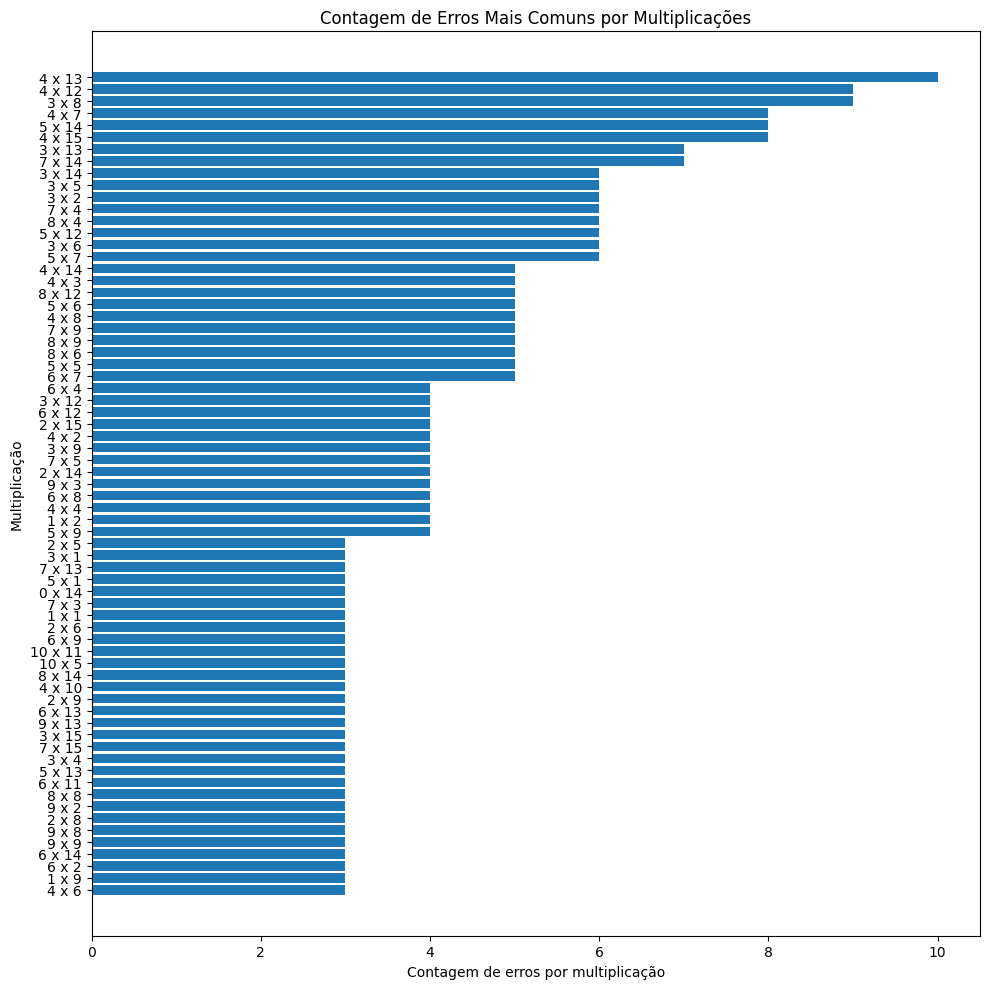

In [13]:
# Cria o gráfico de barras horizontal
plt.figure(figsize=(10, 10))  # Define o tamanho do gráfico
plt.barh(df_multiplication_maior_que_dois.index, df_multiplication_maior_que_dois['count'])  # Plota o gráfico de barras horizontal
plt.title('Contagem de Erros Mais Comuns por Multiplicações')  # Adiciona o título do gráfico
plt.xlabel('Contagem de erros por multiplicação')  # Adiciona o rótulo do eixo x
plt.ylabel('Multiplicação')  # Adiciona o rótulo do eixo y
plt.gca().invert_yaxis()  # Inverte o eixo y para que as barras apareçam na ordem correta
plt.tight_layout()  # Ajusta o layout para evitar que as labels se sobreponham
plt.show()  # Exibe o gráfico

Agora, vamos filtrar as multiplicações que houveram menos erros (2 ou menos)

In [14]:
df_multiplication = pd.DataFrame (df.multiplication.value_counts())
df_multiplication_menor_que_dois=  df_multiplication[df_multiplication['count'] <= 2]

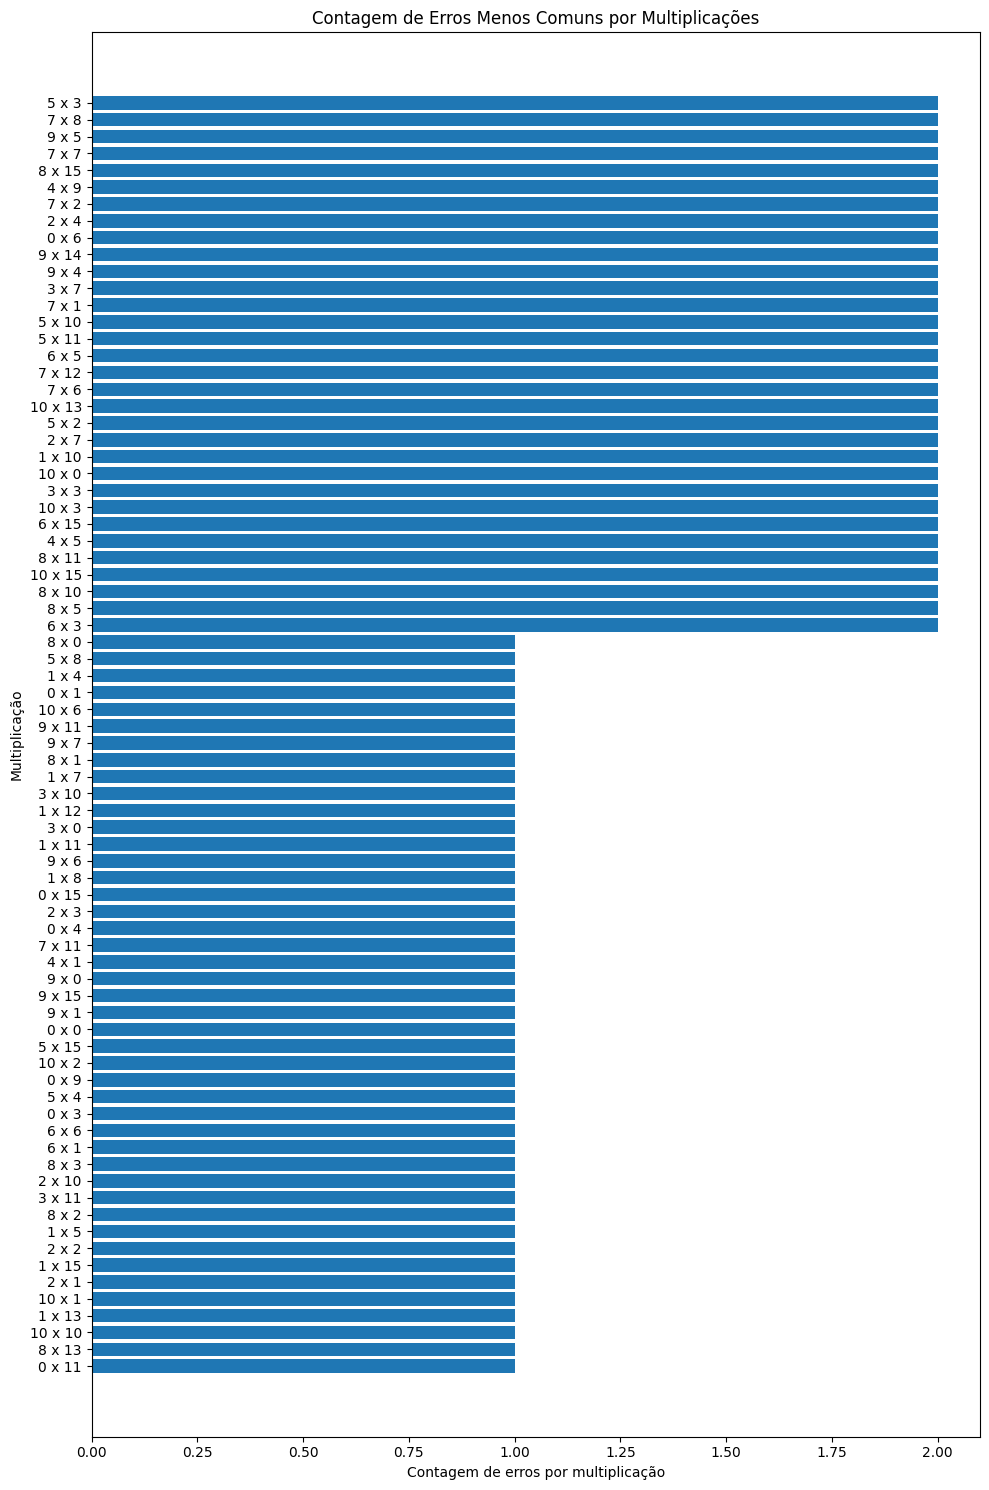

In [15]:
# Cria o gráfico de barras horizontal
plt.figure(figsize=(10, 15))  # Define o tamanho do gráfico
plt.barh(df_multiplication_menor_que_dois.index, df_multiplication_menor_que_dois['count'])  # Plota o gráfico de barras horizontal
plt.title('Contagem de Erros Menos Comuns por Multiplicações')  # Adiciona o título do gráfico
plt.xlabel('Contagem de erros por multiplicação')  # Adiciona o rótulo do eixo x
plt.ylabel('Multiplicação')  # Adiciona o rótulo do eixo y
plt.gca().invert_yaxis()  # Inverte o eixo y para que as barras apareçam na ordem correta
plt.tight_layout()  # Ajusta o layout para evitar que as labels se sobreponham
plt.show()  # Exibe o gráfico

Vamos gerar um novo DataFrame com todas as multiplicações possíveis entre 0x0 e 15x10 e depois compará-las à nossa amostragem. Assim, vamos identificar quais as questões não foram erradas ou então, não foram apresentadas aos alunos.

In [16]:
# Lista para armazenar os resultados das multiplicações
multiplicacoes = []

# Loop para calcular as multiplicações de 0x0 a 15x10
for i in range(16):  # Loop para o multiplicando (0 a 15)
    for j in range(11):  # Loop para o multiplicador (0 a 10)
        multiplicacao_str = f"{i} x {j}"  # Converte para string
        multiplicacoes.append(multiplicacao_str)  # Adiciona à lista

# Cria um DataFrame a partir da lista de resultados
df_multiplicacoes = pd.DataFrame(multiplicacoes, columns=['Multiplicação'])

# Exibe o DataFrame
df_multiplicacoes

,Multiplicação
0,0 x 0
1,0 x 1
2,0 x 2
3,0 x 3
4,0 x 4
...,...
171,15 x 6
172,15 x 7
173,15 x 8
174,15 x 9


In [17]:
valores_sem_correspondencia = df_multiplicacoes[~df_multiplicacoes['Multiplicação'].isin(df['multiplication'])]
pprint (f"Multiplicações onde não houverem erros: {valores_sem_correspondencia['Multiplicação'].tolist()}")

("Multiplicações onde não houverem erros: ['0 x 2', '0 x 5', '0 x 7', '0 x 8', "
 "'0 x 10', '1 x 0', '1 x 3', '1 x 6', '2 x 0', '4 x 0', '5 x 0', '6 x 0', '6 "
 "x 10', '7 x 0', '7 x 10', '8 x 7', '9 x 10', '10 x 4', '10 x 7', '10 x 8', "
 "'10 x 9', '11 x 0', '11 x 1', '11 x 2', '11 x 3', '11 x 4', '11 x 5', '11 x "
 "6', '11 x 7', '11 x 8', '11 x 9', '11 x 10', '12 x 0', '12 x 1', '12 x 2', "
 "'12 x 3', '12 x 4', '12 x 5', '12 x 6', '12 x 7', '12 x 8', '12 x 9', '12 x "
 "10', '13 x 0', '13 x 1', '13 x 2', '13 x 3', '13 x 4', '13 x 5', '13 x 6', "
 "'13 x 7', '13 x 8', '13 x 9', '13 x 10', '14 x 0', '14 x 1', '14 x 2', '14 x "
 "3', '14 x 4', '14 x 5', '14 x 6', '14 x 7', '14 x 8', '14 x 9', '14 x 10', "
 "'15 x 0', '15 x 1', '15 x 2', '15 x 3', '15 x 4', '15 x 5', '15 x 6', '15 x "
 "7', '15 x 8', '15 x 9', '15 x 10']")


Analisando a distribuição de acertos pelo boxplot. Observamos que há um aluno que se destaca bastante nos acertos (35 pontos). A mediana se confirma em 3 pontos.

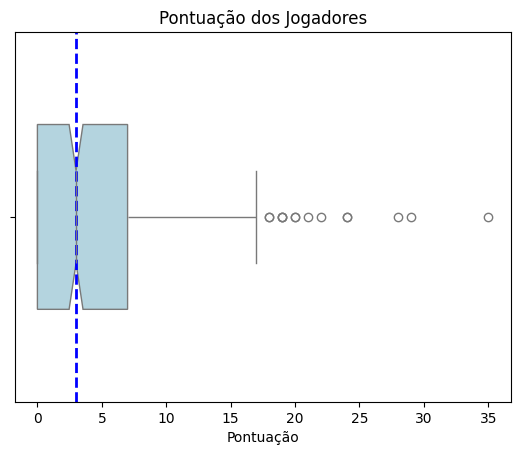

In [18]:
# Dados para o boxplot (supondo que 'df' seja seu DataFrame)
dados = df['hits']
# Calcula a mediana
mediana = dados.median()

# Cria o boxplot com Seaborn
sns.boxplot(x=dados, notch=True, orient='h', width=0.5, color='lightblue')

plt.axvline(x=mediana, color='blue', linestyle='--', linewidth=2)

# Adiciona título ao gráfico
plt.title('Pontuação dos Jogadores')

# Adiciona rótulo aos eixos
plt.xlabel('Pontuação')

# Exibe o boxplot
plt.show()


In [19]:
df.head()

,game_id,hits,multiplication,answer,result
0,21,0,6 x 8,0,48
1,22,0,6 x 9,0,54
2,23,0,10 x 5,0,50
3,24,0,7 x 7,0,49
4,25,0,10 x 1,0,10


In [20]:
# Separar a coluna 'multiplication' em duas colunas 'fator1' e 'fator2'
df[['fator1', 'fator2']] = df['multiplication'].str.split('x', expand=True)

# Converter as novas colunas para o tipo inteiro
df['fator1'] = df['fator1'].astype(int)
df['fator2'] = df['fator2'].astype(int)

In [21]:
from sklearn.cluster import KMeans

# Usar as colunas numéricas (hits, result, fator1, fator2) para o clustering
X = df[['hits', 'result', 'fator1', 'fator2']]

# Aplicar o algoritmo KMeans com 2 clusters
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

# Adicionar as previsões (clusters) ao DataFrame
df['cluster'] = kmeans.labels_

df


,game_id,hits,multiplication,answer,result,fator1,fator2,cluster
0,21,0,6 x 8,0,48,6,8,4
1,22,0,6 x 9,0,54,6,9,4
2,23,0,10 x 5,0,50,10,5,4
3,24,0,7 x 7,0,49,7,7,4
4,25,0,10 x 1,0,10,10,1,5
...,...,...,...,...,...,...,...,...
409,430,5,8 x 12,76,96,8,12,2
410,431,0,4 x 8,0,32,4,8,8
411,432,0,0 x 1,0,0,0,1,6
412,433,0,3 x 2,0,6,3,2,6


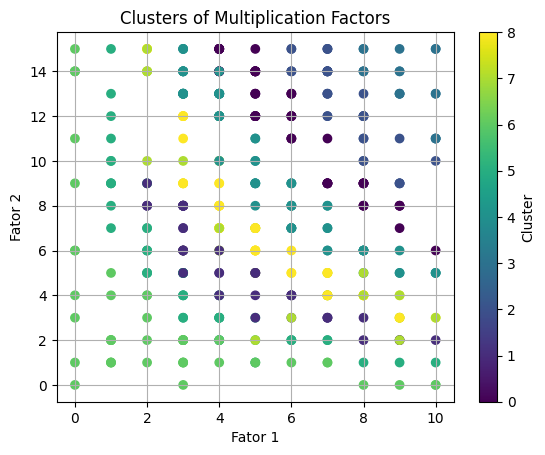

In [22]:
import matplotlib.pyplot as plt

# Plotar os clusters usando 'fator1' e 'fator2'
plt.scatter(df['fator1'], df['fator2'], c=df['cluster'], cmap='viridis', marker='o')
plt.xlabel('Fator 1')
plt.ylabel('Fator 2')
plt.title('Clusters of Multiplication Factors')
plt.colorbar(label='Cluster')  # Adiciona uma barra de cores para identificar os clusters
plt.grid(True)  # Adiciona uma grade para melhor visualização
plt.show()


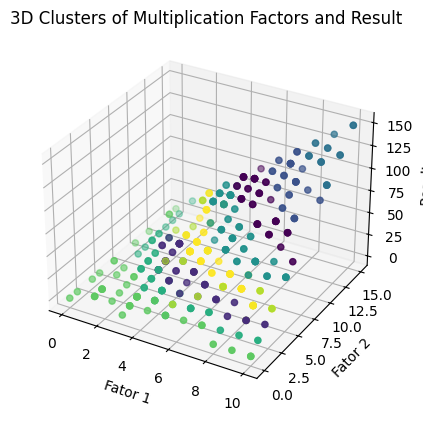

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotar os clusters em 3D
ax.scatter(df['fator1'], df['fator2'], df['result'], c=df['cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Fator 1')
ax.set_ylabel('Fator 2')
ax.set_zlabel('Result')
ax.set_title('3D Clusters of Multiplication Factors and Result')

plt.show()


In [24]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score:.2f}')


Silhouette Score: 0.33


In [25]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.2f}')


Inertia: 25321.21


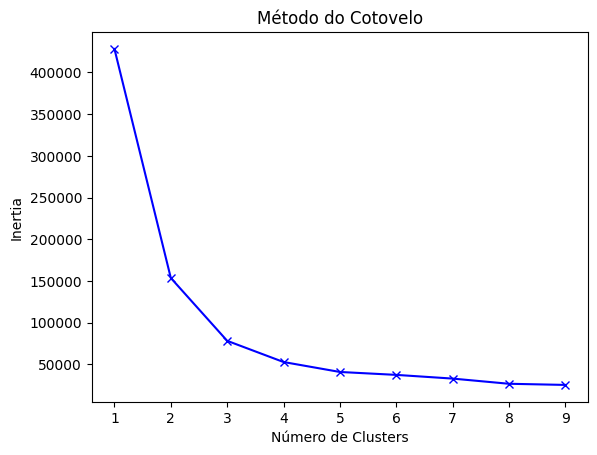

In [26]:
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')
plt.show()


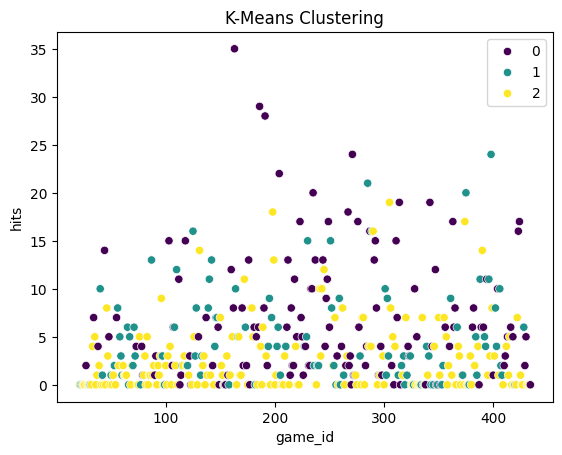

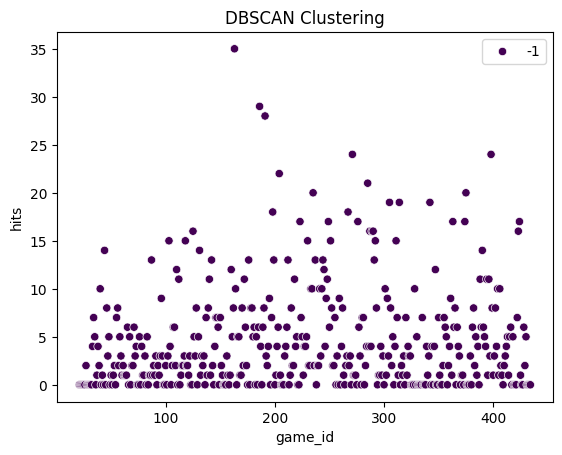

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Etapa de preparação - Excluir colunas irrelevantes (você pode ajustar conforme seus dados)
df_clean = df.select_dtypes(include=['float64', 'int64']).dropna()

# Padronização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Implementando K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Implementando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Adicionando os rótulos aos dados originais
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels

# Visualização dos clusters
sns.scatterplot(x=df_clean.iloc[:, 0], y=df_clean.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

sns.scatterplot(x=df_clean.iloc[:, 0], y=df_clean.iloc[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [46]:
import streamlit as st
import pandas as pd
import plotly.express as px

# Carregar o dataset
df = pd.read_csv("games.csv")

# Criar um seletor de turma
turmas = df['game_grade'].unique()
turma_selecionada = st.selectbox('Selecione a turma:', turmas)

# Filtrar os dados da turma selecionada
df_turma = df[df['game_grade'] == turma_selecionada]

# Calcular métricas relevantes
acertos_por_nivel = df_turma.groupby('game_grade')['hits'].mean().reset_index()

# Gráfico de barras - Acertos por nível
fig = px.bar(acertos_por_nivel, x='game_grade', y='hits', title='Acertos Médios por Nível')
st.plotly_chart(fig)




2024-09-29 18:12:54.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.025 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-29 18:12:54.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [36]:
df

,game_id,game_grade,game_year,player,hits,multiplication,answer,result
0,21,6B,2024,Luara,0,6 x 8,0,48
1,22,6B,2024,Ana Julia Capuci,0,6 x 9,0,54
2,23,6B,2024,Luara,0,10 x 5,0,50
3,24,6B,2024,Luara,0,7 x 7,0,49
4,25,6B,2024,ANA LAURA,0,10 x 1,0,10
...,...,...,...,...,...,...,...,...
409,430,6B,2024,Maria clara,5,8 x 12,76,96
410,431,6E,2024,Liozin,0,4 x 8,0,32
411,432,6E,2024,Lalau,0,0 x 1,0,0
412,433,6E,2024,Fulano de tal 123,0,3 x 2,0,6


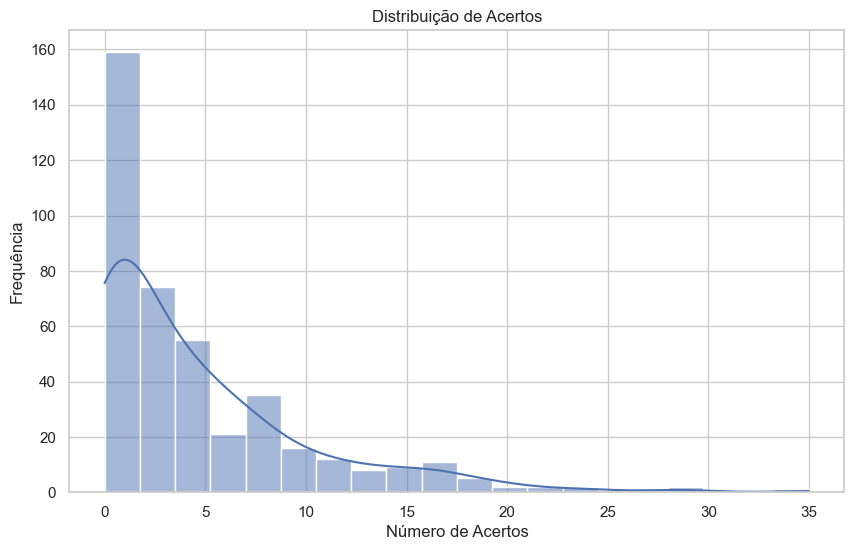

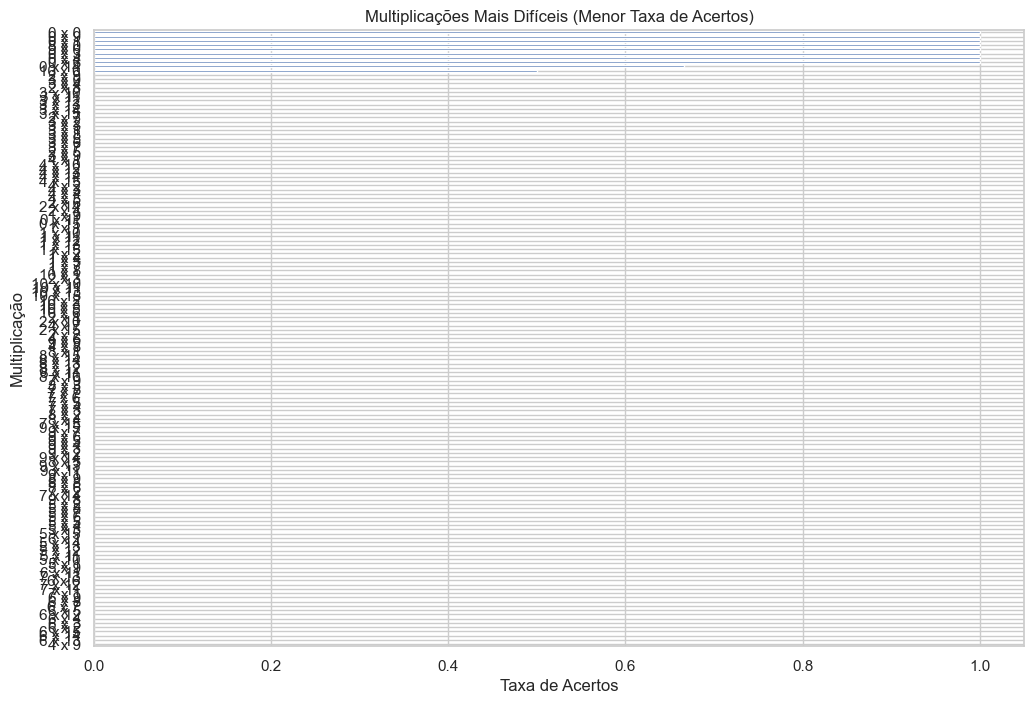

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style='whitegrid')

# Analisar a distribuição de acertos
plt.figure(figsize=(10, 6))
sns.histplot(df['hits'], bins=20, kde=True)
plt.title('Distribuição de Acertos')
plt.xlabel('Número de Acertos')
plt.ylabel('Frequência')
plt.show()

# Analisar as multiplicações mais difíceis
# Criar uma coluna para verificar se a resposta está correta
df['correct'] = df['answer'] == df['result']

# Agrupar por multiplicação e calcular a taxa de acertos
multiplication_difficulty = df.groupby('multiplication')['correct'].mean().sort_values()

# Visualizar as multiplicações mais difíceis
plt.figure(figsize=(12, 8))
multiplication_difficulty.plot(kind='barh')
plt.title('Multiplicações Mais Difíceis (Menor Taxa de Acertos)')
plt.xlabel('Taxa de Acertos')
plt.ylabel('Multiplicação')
plt.show()

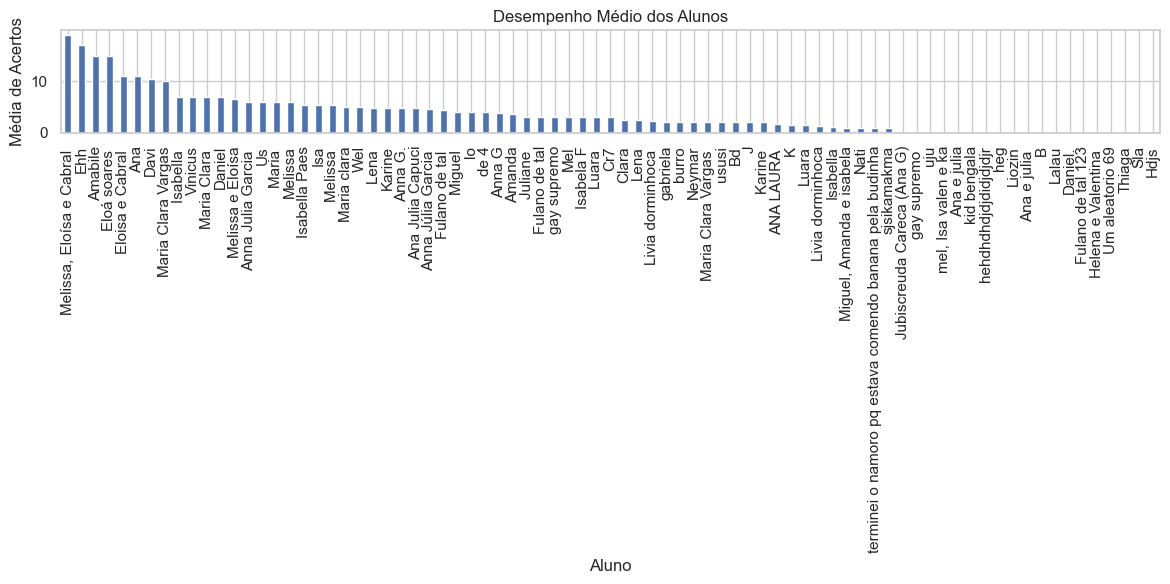

Alunos que podem precisar de mais ajuda:
player
Anna G                                                     3.750000
Amanda                                                     3.655738
Juliane                                                    3.000000
Fulano de tal                                              3.000000
gay supremo                                                3.000000
Mel                                                        3.000000
Isabela F                                                  3.000000
Luara                                                      3.000000
Cr7                                                        3.000000
Clara                                                      2.428571
Lena                                                       2.400000
Livia dorminhoca                                           2.250000
gabriela                                                   2.000000
burro                                                      2.000000


C:\Users\AdminEto\AppData\Local\Temp\ipykernel_13472\3620740603.py:39: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



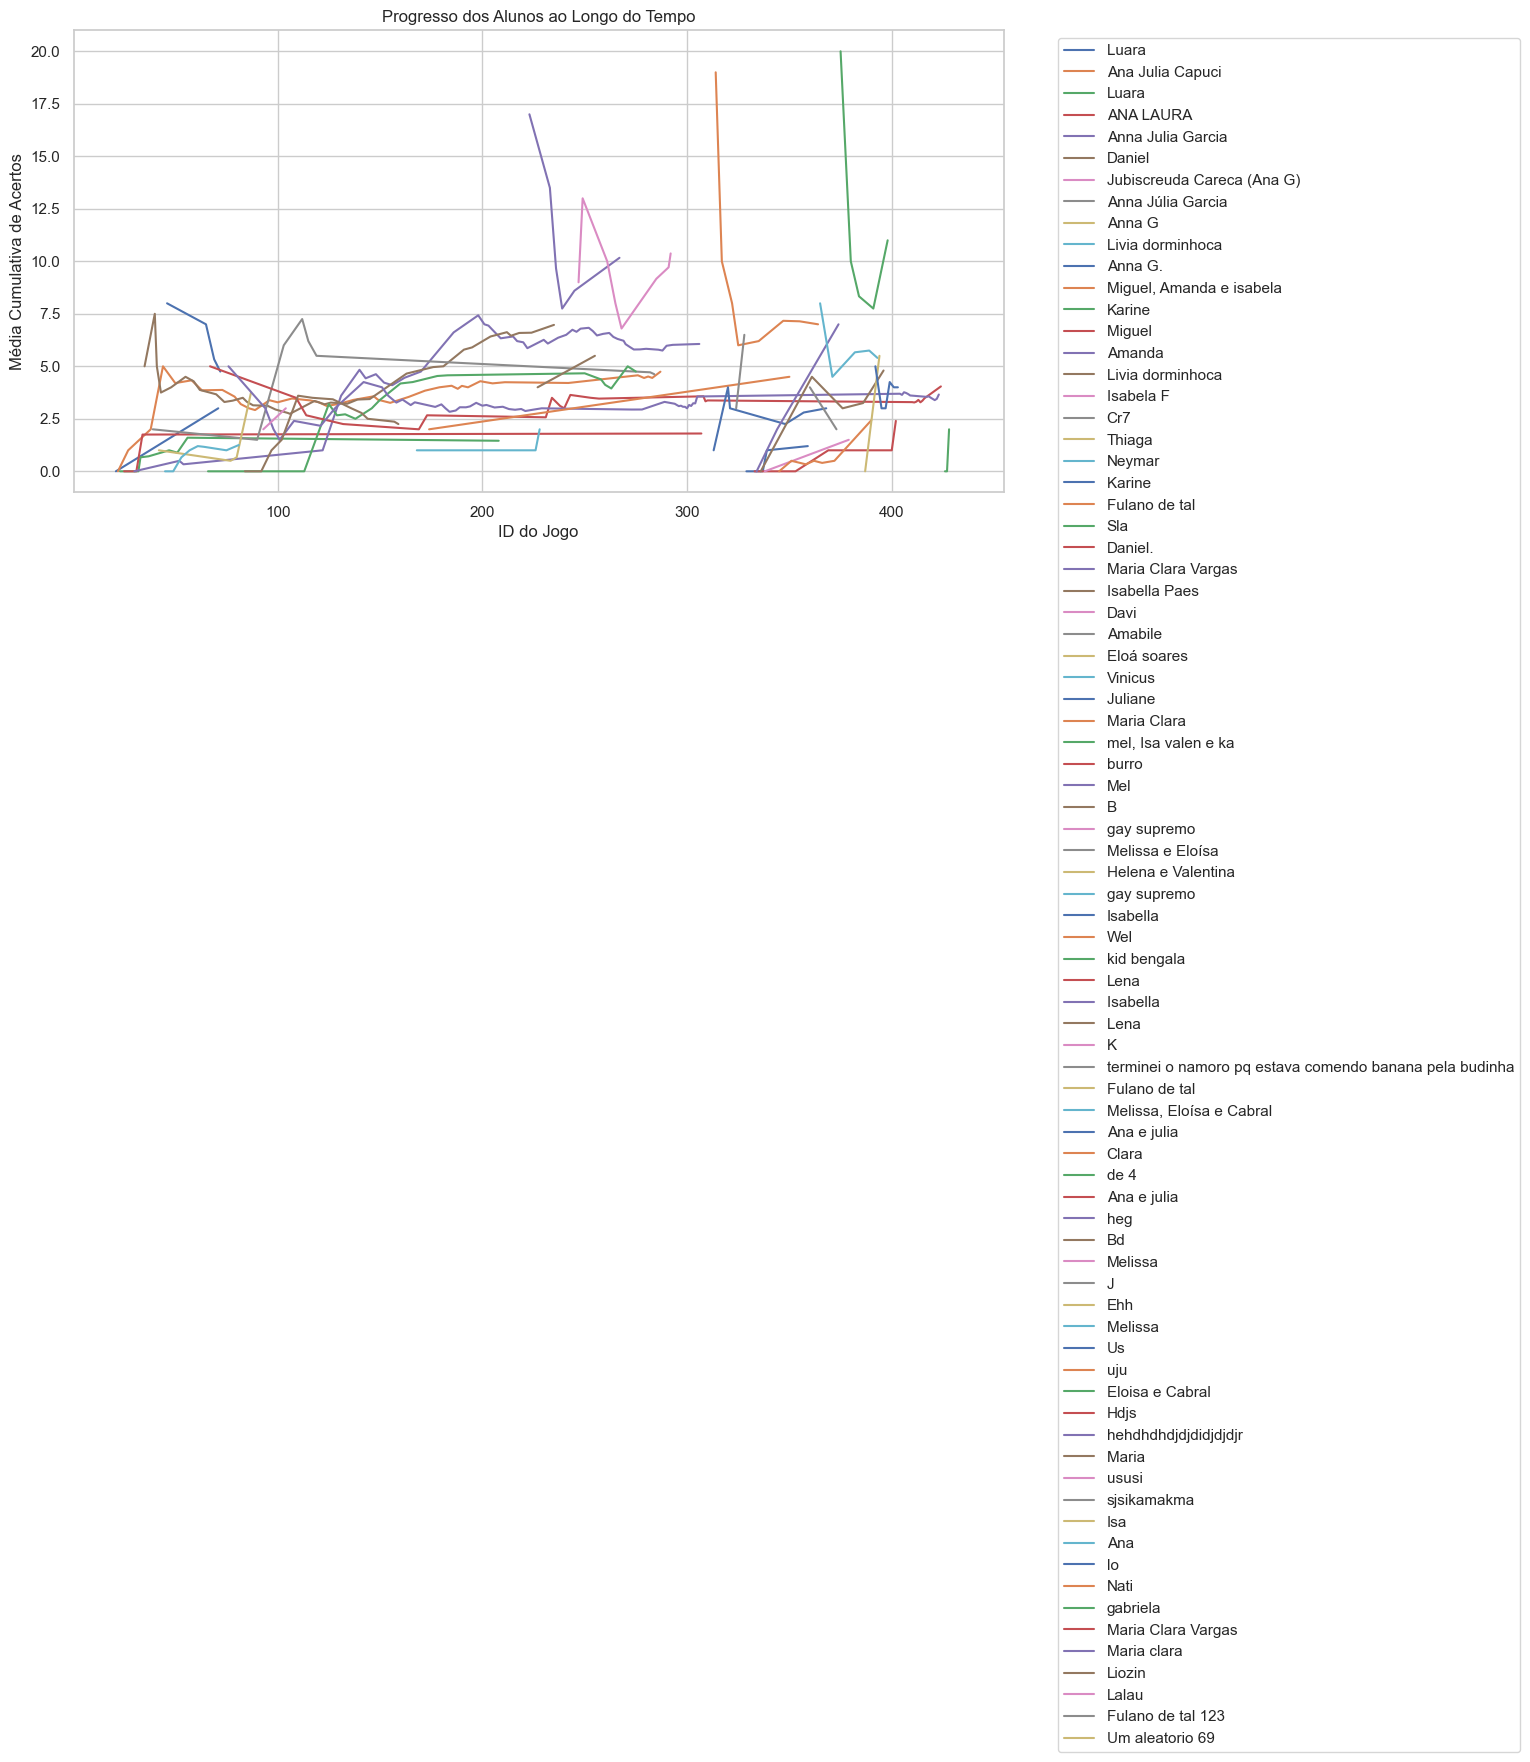

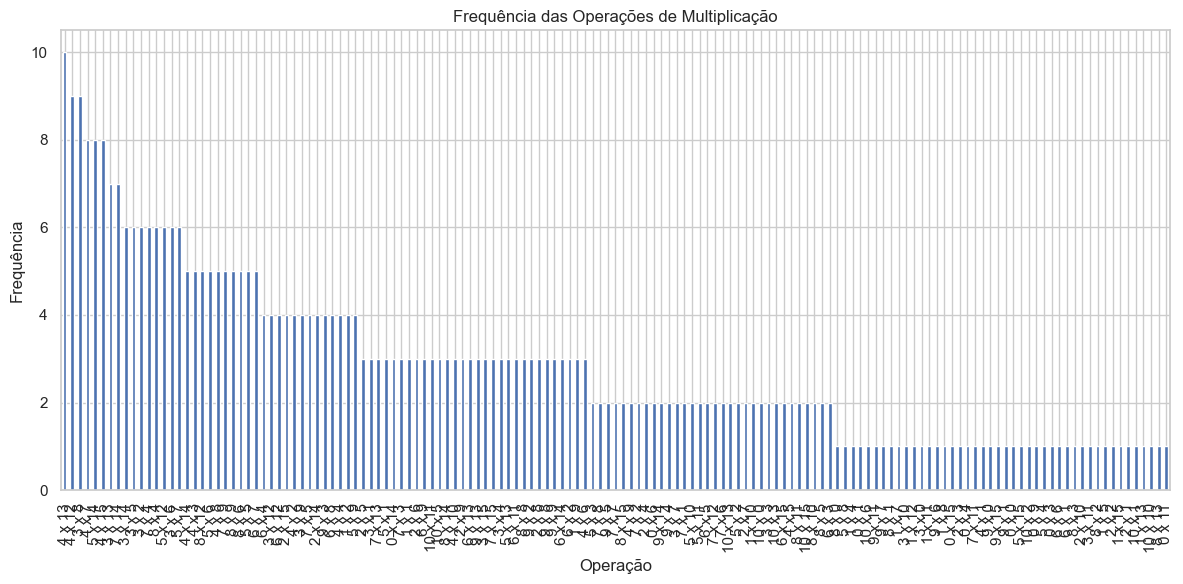

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a m\u00e9dia de acertos por aluno
student_performance = df.groupby('player')['hits'].mean().sort_values(ascending=False)

# Visualizar o desempenho m\u00e9dio dos alunos
plt.figure(figsize=(12, 6))
student_performance.plot(kind='bar')
plt.title('Desempenho M\u00e9dio dos Alunos')
plt.xlabel('Aluno')
plt.ylabel('M\u00e9dia de Acertos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Identificar alunos que podem precisar de mais ajuda
students_needing_help = student_performance[student_performance < student_performance.mean()]

print("Alunos que podem precisar de mais ajuda:")
print(students_needing_help)

# Analisar o progresso ao longo do tempo
df['game_id'] = pd.to_numeric(df['game_id'])
df = df.sort_values('game_id')
df['cumulative_avg'] = df.groupby('player')['hits'].expanding().mean().reset_index(level=0, drop=True)

# Visualizar o progresso dos alunos ao longo do tempo
plt.figure(figsize=(12, 6))
for player in df['player'].unique():
    player_data = df[df['player'] == player]
    plt.plot(player_data['game_id'], player_data['cumulative_avg'], label=player)

plt.title('Progresso dos Alunos ao Longo do Tempo')
plt.xlabel('ID do Jogo')
plt.ylabel('M\u00e9dia Cumulativa de Acertos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# An\u00e1lise das opera\u00e7\u00f5es mais frequentes
operation_frequency = df['multiplication'].value_counts()

plt.figure(figsize=(12, 6))
operation_frequency.plot(kind='bar')
plt.title('Frequ\u00eancia das Opera\u00e7\u00f5es de Multiplica\u00e7\u00e3o')
plt.xlabel('Opera\u00e7\u00e3o')
plt.ylabel('Frequ\u00eancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()